An AN receives a vector of I input signals, either $$z = (z_1 , z_2 , ··· , z_I )$$ from the environment or from
other ANs. To each input signal, $z_i$, is associated a weight, $v_i$, to strengthen or deplete the input signal.
The strength of the output signal is further influenced by a threshold value, θ, also referred to as the bias.

![image.png](images/neuron.png)


### 1. Net input with threshold



$$
\text{net} = \sum_{i=1}^{n} w_i x_i - \theta
$$

where $\theta$ is the **threshold**.



### 2. Trick: absorb the threshold into the weights

Introduce a **bias input** $x_0 = 1$.
Now define an **extended weight vector**:

$$
\mathbf{w}' = (w_0, w_1, w_2, \dots, w_n)
$$

with

$$
w_0 = -\theta
$$

and the extended input vector:

$$
\mathbf{x}' = (x_0, x_1, x_2, \dots, x_n) = (1, x_1, x_2, \dots, x_n).
$$


### 3. Compact dot product form

Now the net input becomes a **dot product**:

$$
\text{net} = \mathbf{w}' \cdot \mathbf{x}' = \sum_{i=0}^n w_i x_i
$$

This is why in modern NN frameworks (PyTorch, TensorFlow, etc.), we don’t talk about $\theta$ anymore — it’s simply part of the **bias weight**.


# Activation Functions 

The function $$f_{AN}$$ receives the net input signal and bias, and determines the output (or ring strength) of the neuron. This function is referred to as the activation function.






# Linear Function

![image.png](images/linear.png)

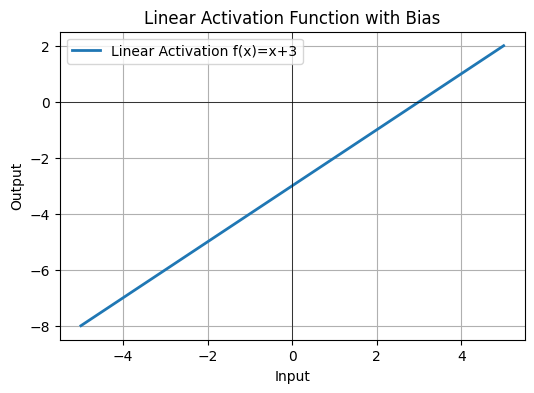

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
x = np.linspace(-5, 5, 100)  # 100 points between -5 and 5

# Define bias
b = 3   # change this value to see effect

# Linear activation with bias: f(x) = x + b
y = x - b

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, label=f"Linear Activation f(x)=x+{b}", linewidth=2)

# Add details
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Linear Activation Function with Bias")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


# Step Function
![image.png](images/step.png)

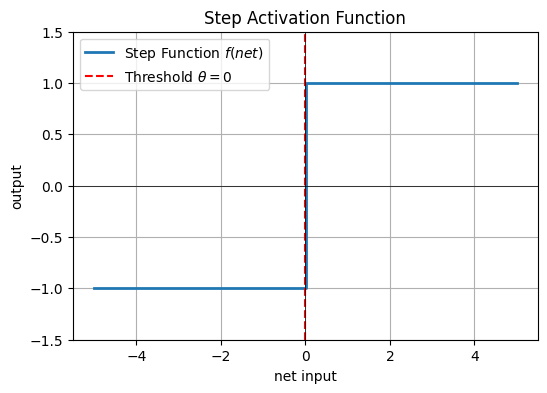

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
net = np.linspace(-5, 5, 200)  # range of inputs
theta = 0  # threshold

# Step activation function: outputs 1 if net >= theta else -1
f = np.where(net >= theta, 1, -1)

# Plot
plt.figure(figsize=(6,4))
plt.plot(net, f, drawstyle="steps-post", linewidth=2, label=r"Step Function $f(net)$")
plt.axvline(theta, color="red", linestyle="--", label=fr"Threshold $\theta={theta}$")

# Details
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Step Activation Function")
plt.xlabel("net input")
plt.ylabel("output")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()


# Ramp Function

![image.png](images/ramp.png)

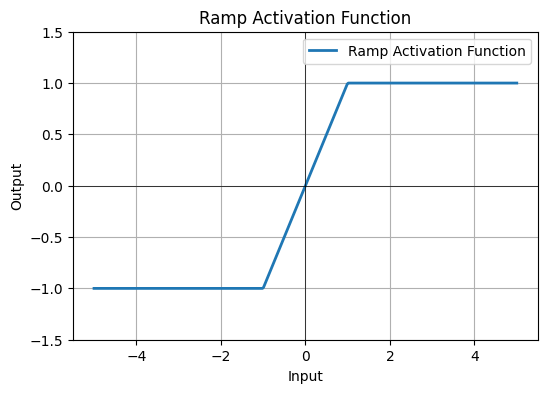

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
x = np.linspace(-5, 5, 400)

# Ramp activation
def ramp(x):
    return np.clip(x, -1, 1)

y = ramp(x)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, linewidth=2, label="Ramp Activation Function")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Ramp Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()


# Sigmoid Activation Function
![image.png](images/sigmoid.png)

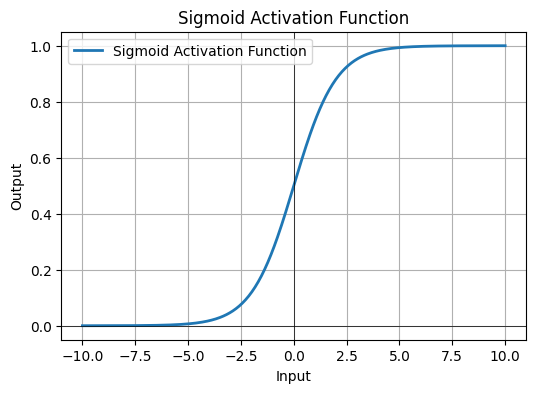

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
x = np.linspace(-10, 10, 400)

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y = sigmoid(x)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, linewidth=2, label="Sigmoid Activation Function")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Sigmoid Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


# Sigmoid Gaussian Function
![image.png](images/gaussian.png)

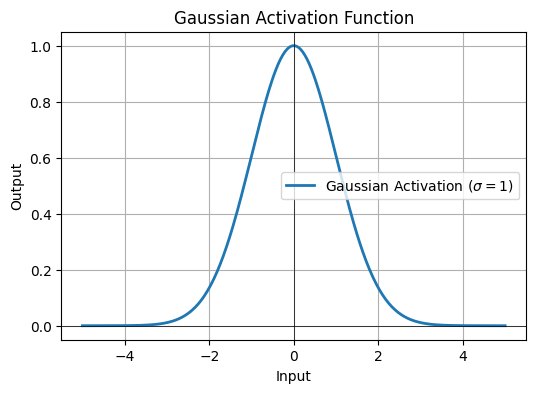

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
x = np.linspace(-5, 5, 400)

# Gaussian activation function
def gaussian(x, sigma=1.0):
    return np.exp(-x**2 / (2 * sigma**2))

y = gaussian(x, sigma=1.0)

# Plot
plt.figure(figsize=(6,4))
plt.plot(x, y, linewidth=2, label=r"Gaussian Activation ($\sigma=1$)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("Gaussian Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


# Artificial neuron

Single neurons can be used to realize linearly separable functions without any error.
    
![image.png](images/artificial-neuron-linear-separate.png)

# AND Perceptron
![image.png](images/and-perceptron.png)

In [2]:
import numpy as np

# Inputs (truth table for 2 variables)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Desired AND output as a column vector
t = np.array([[0],
              [0],
              [0],
              [1]], dtype=int)

# Weight vector and threshold
theta = 2
w = np.array([-1, 1])

# Compute perceptron output
outputs = []
for i, x in enumerate(X):
    z = w[0] * x[0] + w[1] * x[1] - theta
    xp = np.append(x,-1)
    wp = np.append(w, theta)
    zp = np.dot(wp,xp)
    print(f'using dot {zp}, weighted sum{z}')
    y = 1 if z >= 0 else 0
    outputs.append(y)
    print(f"Input: {x}, Net: {z:.2f}, Output: {y}, Target: {t[i,0]}")

# Compare with AND truth table
print("\nTarget (AND):", t.ravel())
print("Model Output :", outputs)


using dot -2, weighted sum-2
Input: [0 0], Net: -2.00, Output: 0, Target: 0
using dot -1, weighted sum-1
Input: [0 1], Net: -1.00, Output: 0, Target: 0
using dot -3, weighted sum-3
Input: [1 0], Net: -3.00, Output: 0, Target: 0
using dot -2, weighted sum-2
Input: [1 1], Net: -2.00, Output: 0, Target: 1

Target (AND): [0 0 0 1]
Model Output : [0, 0, 0, 0]


# OR Perceptron
![image.png](images/orperceptron.png)

$$minimize~\sum_{p=1}^n (t_p-o_p)^2$$

In [8]:
import numpy as np

# Inputs (truth table for 2 variables)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Desired OR output as a column vector
t = np.array([[0],
              [1],
              [1],
              [1]], dtype=int)

# Weight vector and threshold
theta = 2
w = np.array([1, 4, theta])

# Compute perceptron output
outputs = []
for i, x in enumerate(X):
    z = w[0] * x[0] + w[1] * x[1] - theta
    xp = np.append(x,-1)
    zp = np.dot(w,xp)
    print(f'using dot {zp}, weighted sum{z}')
    y = 1 if z >= 0 else 0
    outputs.append(y)
    print(f"Input: {x}, Net: {z:.2f}, Output: {y}, Target: {t[i,0]}")

# Compare with AND truth table
print("\nTarget (AND):", t.ravel())
print("Model Output :", outputs)


using dot -2, weighted sum-2
Input: [0 0], Net: -2.00, Output: 0, Target: 0
using dot 2, weighted sum2
Input: [0 1], Net: 2.00, Output: 1, Target: 1
using dot -1, weighted sum-1
Input: [1 0], Net: -1.00, Output: 0, Target: 1
using dot 3, weighted sum3
Input: [1 1], Net: 3.00, Output: 1, Target: 1

Target (AND): [0 1 1 1]
Model Output : [0, 1, 0, 1]


# XOR Perceptron

![image.png](images/xorperceptron.png)

using dot -2, weighted sum-2
Input: [0 0], Net: -2.00, Output: 0, Target: 0
using dot 2, weighted sum2
Input: [0 1], Net: 2.00, Output: 1, Target: 1
using dot -1, weighted sum-1
Input: [1 0], Net: -1.00, Output: 0, Target: 1
using dot 3, weighted sum3
Input: [1 1], Net: 3.00, Output: 1, Target: 0

Target (AND): [0 1 1 0]
Model Output : [0, 1, 0, 1]


In [34]:

import numpy as np

def forward(z, v):
    n, m = v.shape
    # augmented input [x1, x2, -1]^T
    x = np.ones((m, 1)) * -1
    x[:-1, 0] = z
    net = np.dot(v, x)   # (n,1)
    return net

# Inputs (truth table for 2 variables)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)

# Desired AND output (column vector)
t = np.array([[0],
              [0],
              [0],
              [1]], dtype=float)

# Weight row vector: [w1, w2, bias]
theta = 2
v = np.array([[-1, 1, theta]])  # shape (1,3)

outputs = []
for i, x in enumerate(X):
    z = forward(x, v)
    y = 1 if z >= 0 else 0
    outputs.append(y)
    print(f"Input: {x}, Net: {z[0,0]:.2f}, Output: {y}, Target: {int(t[i,0])}")

# Compare with AND truth table
print("\nTarget (AND):", t.ravel().astype(int))
print("Model Output :", outputs)


Input: [0. 0.], Net: -2.00, Output: 0, Target: 0
Input: [0. 1.], Net: -1.00, Output: 0, Target: 0
Input: [1. 0.], Net: -3.00, Output: 0, Target: 0
Input: [1. 1.], Net: -2.00, Output: 0, Target: 1

Target (AND): [0 0 0 1]
Model Output : [0, 0, 0, 0]


![image.png](images/gradient-descent.png)
![image.png](images/steepest-descent.png)


# Steepest Descent

![image.png](images/steepest-descent2.png)

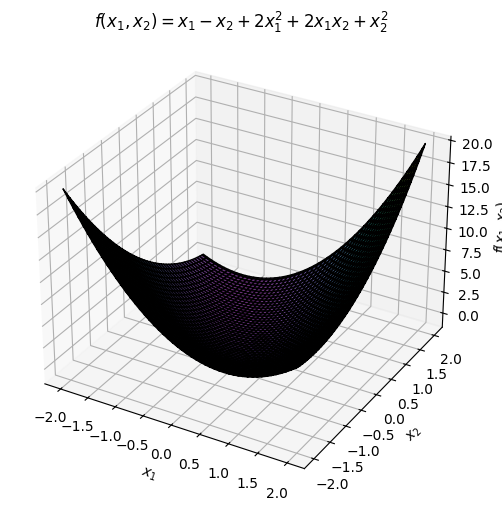

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define function
def f(x1, x2):
    return x1 - x2 + 2*x1**2 + 2*x1*x2 + x2**2

# Create grid of points
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# 3D surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels
ax.set_title(r"$f(x_1,x_2) = x_1 - x_2 + 2x_1^2 + 2x_1x_2 + x_2^2$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x_1,x_2)$")

plt.show()


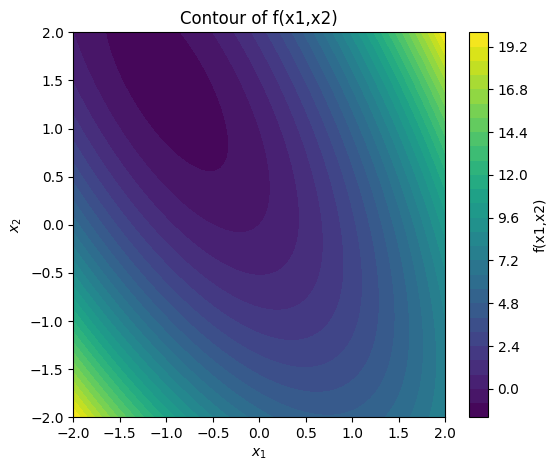

In [26]:
plt.figure(figsize=(6,5))
plt.contourf(X1, X2, Z, levels=30, cmap='viridis')
plt.colorbar(label="f(x1,x2)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contour of f(x1,x2)")
plt.show()

# Steepest Descent


![image.png](images/steepest-descent3.png)
![image.png](images/steepest-descent4.png)

In [13]:
import numpy as np

def forward(z, v):
    n, m = v.shape
    # augmented input [x1, x2, -1]^T  (bias input = -1)
    x = np.ones((m, 1)) * -1
    x[:-1, 0] = z
    net = np.dot(v, x)
    #y = net                   # identity activation
    y = 1.0 / (1.0 + np.exp(-net))
    return x, y

# Truth table (AND)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)

t = np.array([[0],
              [0],
              [0],
              [1]], dtype=float)

# Initialize weights
np.random.seed(0)
v = np.random.uniform(-1, 1, (1, 3))  # shape (1,3): [w1, w2, bias_weight]

eta = 0.1
epochs = 200

for epoch in range(epochs):
    total_loss = 0.0
    for i, x in enumerate(X):
        x_aug, y = forward(x, v)           
        err = t[i] - y # (1,1)
        err_val = err.item()               # extract scalar
        total_loss += err_val**2

        # Gradient step
        v += eta * 2*np.dot(err, x_aug.T) # modify it by sigmoid

    if total_loss < 1e-6:
        break

# Evaluate with threshold 0.5
outputs = []
for x in X:
    _, y = forward(x, v)
    y_bin = int(y[0,0] >= 0.5)
    outputs.append(y_bin)
    print(f"Input: {x}, y_cont={y[0,0]:.3f}, y_bin={y_bin}")

print("\nLearned weights:", v)
print("Target (AND):   ", t.ravel().astype(int))
print("Model Output:   ", outputs)


Input: [0. 0.], y_cont=-0.312, y_bin=0
Input: [0. 1.], y_cont=0.250, y_bin=0
Input: [1. 0.], y_cont=0.313, y_bin=0
Input: [1. 1.], y_cont=0.875, y_bin=1

Learned weights: [[0.625  0.5625 0.3125]]
Target (AND):    [0 0 0 1]
Model Output:    [0, 0, 0, 1]


# Feedforward neural network (FFNN)

It has been proved that FFNNs with monotonically increasing differentiable functions can approximate any continuous function with one hidden layer, provided that the hidden layer has enough hidden neurons (Gudise and Venayagamoorthy, 2003)

![image.png](images/ffnn.png)

# Updating Weights
![image.png](images/ffnn-weights.png)